Title of Assignment-2:

Implementing Feedforward neural networks with Keras and TensorFlow

a. Import the necessary packages

b. Load the training and testing data (MNIST)

c. Define the network architecture using Keras

d. Train the model using SGD

e. Evaluate the network

f. Plot the training loss and accuracy

In [1]:
# importing necessary libraries
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')

Loading and preparing the data

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

Loading and preparing the data

MNIST stands for “Modified National Institute of Standards and Technology”.
It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels 
i.e. about 784 features. Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black). 
This database is further divided into 60,000 training and 10,000 testing images.

In [3]:
#import dataset and split into train and test data
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# to see length of training dataset
len(x_train)

60000

In [5]:
# to see length of testing dataset
len(x_test)

10000

In [6]:
# shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [7]:
# shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

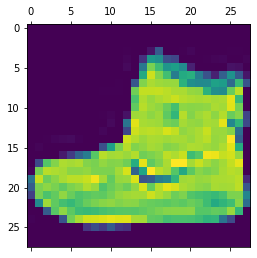

In [9]:
# to see how first image look
plt.matshow(x_train[0])

In [10]:
# normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Define the network architecture using Keras & Creating the model

The ReLU function is one of the most popular activation functions. 
It stands for “rectified linear unit”. Mathematically this function is defined as:
y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if 
the input is positive. 
The softmax function is another activation function. 
It changes input values into values that reach from 0 to 1.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7431 - accuracy: 0.7584 - val_loss: 0.5786 - val_accuracy: 0.7992
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5148 - accuracy: 0.8245 - val_loss: 0.5097 - val_accuracy: 0.8234
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4702 - accuracy: 0.8373 - val_loss: 0.4954 - val_accuracy: 0.8246
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4441 - accuracy: 0.8462 - val_loss: 0.4733 - val_accuracy: 0.8360
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4265 - accuracy: 0.8516 - val_loss: 0.4473 - val_accuracy: 0.8434
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4124 - accuracy: 0.8564 - val_loss: 0.4448 - val_accuracy: 0.8408
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4014 - accuracy: 0.8617 - val_loss: 0.4241 - val_accuracy:

In [15]:
# Evaluate the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8570
Loss=0.408
Accuracy=0.857


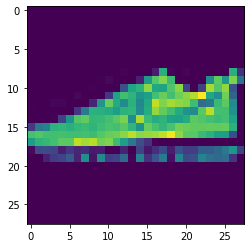

In [34]:
# Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [36]:
# we use predict() on new data
predicted_value=model.predict(x_test)
print("Class number of the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Class number of the image is= 7


In [22]:
# Plot graph for Accuracy and Loss
get_ipython().run_line_magic('pinfo2', 'history.history')

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

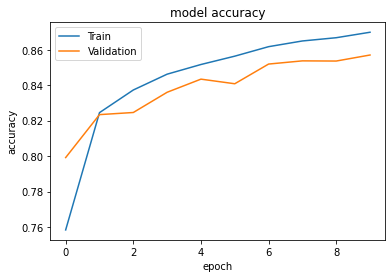

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

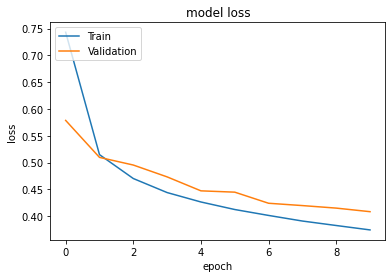

In [25]:
# graph representing the model’s accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

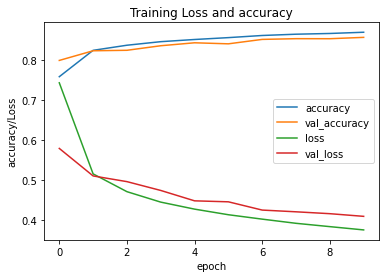

In [26]:
# graph represents the model’s loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()